In [1]:
import pandas as pd

In [2]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 1\\insurance.csv")

In [3]:
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Dropping region column which is not helpful for the model

In [4]:
x.drop(["region"],axis=1,inplace=True)

In [5]:
x.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


# let's build a simple Linear Regression Model taking bmi as an input variable

# Checking the target Variable following normal distribution or not

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

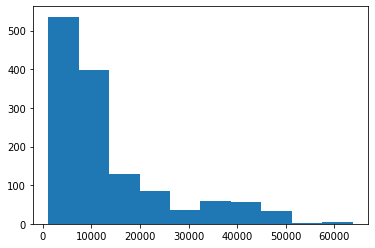

In [6]:
import matplotlib.pyplot as plt
plt.hist(x["charges"])

# Performing Transformations inorder to make Target variable normal

In [7]:
import numpy as np
x["charges"]=np.log(x["charges"])

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <a list of 10 Patch objects>)

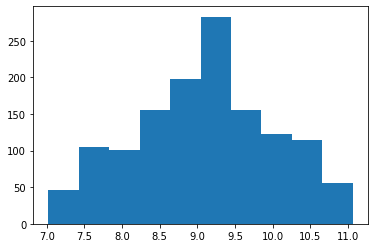

In [8]:
plt.hist(x["charges"])

# Checking the Linear Relation Ship Between Input Variable and Output Variable

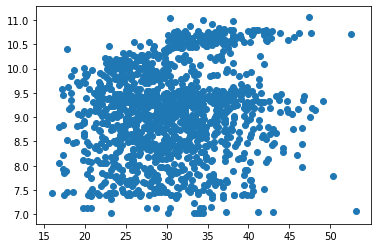

In [9]:
plt.scatter(x["bmi"],x["charges"])

# Checking if input varibles are independent to each other

In [10]:
x.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
charges,0.527834,0.132669,0.161336,1.000000


# Building a model

In [11]:
a=x["bmi"].values.reshape(-1,1)
b=x["charges"].values.reshape(-1,1)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
l=LinearRegression()
l.fit(a,b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=123)

In [15]:
l.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
pred=l.predict(x_train)

# Calculating MSE(mean squared error)

In [18]:
print(metrics.mean_squared_error(y_train,pred)*10)

8.432858169075919


# Calculating RMSE (Root Mean Squared Error)

In [19]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_train,pred)*10))

2.9039383893388506


# Calculating MAPE (Mean Absolute Percentage Error)

In [20]:
print(np.mean(((abs(y_train-pred)/y_train)*100)))

8.426933118855038


# Predections On Test Side

In [21]:
pred1=l.predict(x_test)


In [22]:
print(metrics.mean_squared_error(y_test,pred1)*10)

7.777052799206441


In [23]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred1)*10))

2.7887367748151566


In [24]:
print(np.mean(((abs(y_test-pred1)/y_test)*100)))

7.893867436885194


# Post Assumptions 

# 1. Errors Should follow normality ( Histogram Plot can be used)
# 2. No Auto Correlation 
# 3. Homosedacity
# 4. Levarages and Outliers (Cook's Distance can be used)
# 5. MultiCollinearity (VIF)

# VIF Should be low in order to avoid Multi Collinearity

# VIF=1/1-r^2
# r^2 close to 0 it leads to bad model
# r^2 close to 1 it leads to Good model